In [1]:
#At the beginning of my work I uploaded diffrent libraries, which I'll need for my work:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot



from matplotlib import cm
from sklearn.preprocessing import MinMaxScaler  
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier


#libraries for models
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#accuracy metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [69]:
#File Upload
red=pd.read_csv('winequality_red.csv', sep=";", header=0)

In [70]:
#Cleaning of data:
#red=red.reset_index()
#red['fixed acidity'].isnull().sum()                         #if value is null
#red['volatile acidity'].isnull().sum()                       #if value is null

#red['dup']=red.duplicated()
#red=red[red['dup']==True]
#red.drop('dup',axis=1)
red.drop_duplicates(inplace=True)                                     #vymazala som duplicovane riadky
#print(red)

In [72]:
# Creating the column (Qgood), which has value 1 when quality is 7 or 8.
red['Qgood']= red['quality'].apply(lambda x: 1 if (x==7 or x==8) else 0)
#red=red[red['Qgood']==1]
#print(red)

In this code I visualise dependency between variables. If two variables have big dependency between each other I expect that one of these variables can be redundant(in my case I coudl suggest that critic acid has high correlation wiht fixed acid and volatile acid. In 3.scenario I could try if in case of skipping of variable helps to better predict model ). If variable have high correlation with result. I need this variable involved as feathure in my predictions model. 

* 1  In first part I will try to make prediction dependant on all 11 feathures. 
* 2  In second part I'll make prediction only on feathers which have high dependency with result. It will help if my model overfiting data. Model suffer on high variance when model have really good results on training data a much worse on test data. For second part I choose following feathures: fix acidity, volatile acidity, critic acidity, toral sulfur dioxide, density, sulphates, alcohol. (7 feathures)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Qgood
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.116120
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.267344
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.203561
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.052811
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.096806
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.072771
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.135877
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.158052
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.054131
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.201551


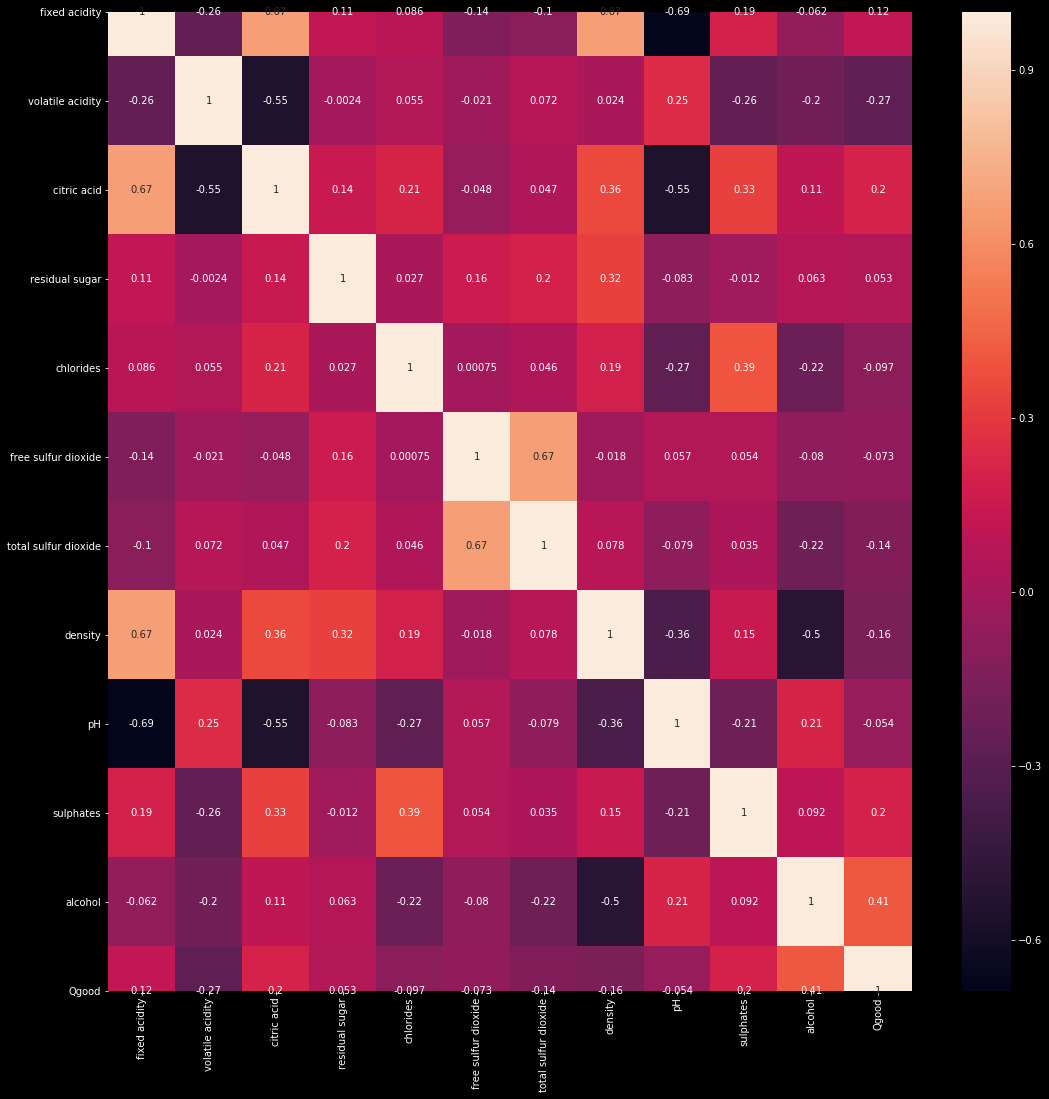

In [5]:
#visualasing dependency between variables and result
corRed=red.iloc[:,red.columns!='quality']
corr=corRed.corr()

fig = plt.figure(figsize=(18,18))
g=sns.heatmap(corr,annot=True)
corr

In this part I am auploading data and I'm scalling them. For first case, I am uploading all variables and for second case I am aploadin only 7 variables. For first and second scenario I scale data, because I can see in data description, that units don't occur in interval <-1,1> For that reason data with bigger units have bigger influence on my results.

In [6]:
#Uploading variable and using scaleing

#First scenario
#Data1
X1=red.iloc[:,0:11]
y1=red['Qgood']
#Split data
X1_train, X1_test, y1_train, y1_test=train_test_split(X1,y1,test_size=0.2, random_state=0)
#scaleing
scaler1=MinMaxScaler().fit(X1_train)
x1TrainScaled=scaler1.transform(X1_train)
x1TestScaled=scaler1.transform(X1_test)

#Second scenario
#Data2
X2=red.iloc[:,[0,1,2,6,7,9,10]]
#Split data
X2_train, X2_test, y2_train, y2_test=train_test_split(X2,y1,test_size=0.2, random_state=0)
#scaleing
scaler2=MinMaxScaler().fit(X2_train)
x2TrainScaled=scaler2.transform(X2_train)
x2TestScaled=scaler2.transform(X2_test)

#### Different model being used for binary classifiacation.

In [7]:
len(X1_train)

1087

###k_nearest Neighbors classifier

K_NN model was created and tested in which ccase test data will bring the best result. Model was tested at first in first scenario for conditions of diffrent number of Neighbors. Then was tested second scenario.
* First Scenario - 

In [26]:
#k_nearest Neighbors classifier Scenario 1

#model with diffrent number of neighbours
a=[3,5,10,15,30,100]
scores1=[]
bestPreKNN1=0
indexKNN1=0


for i in a: 
    knnc1=KNeighborsClassifier(n_neighbors=i).fit(x1TrainScaled,y1_train)
    y1KnncPred=knnc1.predict(x1TestScaled)
    scores1.append(precision_score(y1_test,y1KnncPred))

    if precision_score(y1_test,y1KnncPred)>=bestPreKNN1:
        bestPreKNN1=precision_score(y1_test,y1KnncPred)
        indexKNN1=i

    #scores on train and test data
    print('K_nearest Neighbour classifier on Train_scaled_data with {}_neighbors:{}'.format(i,knnc1.score(x1TrainScaled,y1_train)))
    print('K_nearest Neighbour classifier on Test_scaled_data with {}_neighbors:{}'.format(i,knnc1.score(x1TestScaled,y1_test)))

    #precision evaluation matrics
    print('K_nearest Neighbour classifier on Test_scaled_data with {}_neighbors:{}'.format(i,precision_score(y1_test,y1KnncPred)))    

    #confusion matrix
    print('K_nearest Neighbour classifier with {}_neighbors:\n{}'.format(i,confusion_matrix
(y1_test,y1KnncPred)))

    #precision evaluation matrics
    print('Precision on K_nearest Neighbour classifider with {}_neighbors is:{}'.format(i,precision_score(y1_test,y1KnncPred)))

#visualise results of k_neares NeighobrsClassifier in dependency of  
plt.figure()
plt.xlabel('k')
plt.ylabel('accurancy')
plt.scatter(a,scores1,c='green')


#Precision of the model
Knn_results1={index1:bestScore1}
print('K_nearest Neighbour classifier with best results is {} and has {}_neighbors:'.format(bestPreKNN1,indexKNN1))


K_nearest Neighbour classifier on Train_scaled_data with 3_neighbors:0.9254829806807727
K_nearest Neighbour classifier on Test_scaled_data with 3_neighbors:0.8198529411764706
K_nearest Neighbour classifier on Test_scaled_data with 3_neighbors:0.36363636363636365
K_nearest Neighbour classifier with 3_neighbors:
[[211  21]
 [ 28  12]]
Precision on K_nearest Neighbour classifider with 3_neighbors is:0.36363636363636365
K_nearest Neighbour classifier on Train_scaled_data with 5_neighbors:0.9089236430542779
K_nearest Neighbour classifier on Test_scaled_data with 5_neighbors:0.8161764705882353
K_nearest Neighbour classifier on Test_scaled_data with 5_neighbors:0.32142857142857145
K_nearest Neighbour classifier with 5_neighbors:
[[213  19]
 [ 31   9]]
Precision on K_nearest Neighbour classifider with 5_neighbors is:0.32142857142857145
K_nearest Neighbour classifier on Train_scaled_data with 10_neighbors:0.8969641214351426
K_nearest Neighbour classifier on Test_scaled_data with 10_neighbors:0.

NameError: name 'index1' is not defined

K_nearest Neighbour classifier on Train_scaled_data with 3_neighbors:0.9300827966881324
K_nearest Neighbour classifier on Test_scaled_data with 3_neighbors:0.8272058823529411
K_nearest Neighbour classifier with 3_neighbors:
[[213  19]
 [ 28  12]]
Precision on K_nearest Neighbour classifider with 3_neighbors is:0.3870967741935484
K_nearest Neighbour classifier on Train_scaled_data with 5_neighbors:0.920883164673413
K_nearest Neighbour classifier on Test_scaled_data with 5_neighbors:0.8272058823529411
K_nearest Neighbour classifier with 5_neighbors:
[[215  17]
 [ 30  10]]
Precision on K_nearest Neighbour classifider with 5_neighbors is:0.37037037037037035
K_nearest Neighbour classifier on Train_scaled_data with 10_neighbors:0.9015639374425023
K_nearest Neighbour classifier on Test_scaled_data with 10_neighbors:0.8455882352941176
K_nearest Neighbour classifier with 10_neighbors:
[[222  10]
 [ 32   8]]
Precision on K_nearest Neighbour classifider with 10_neighbors is:0.4444444444444444
K_n

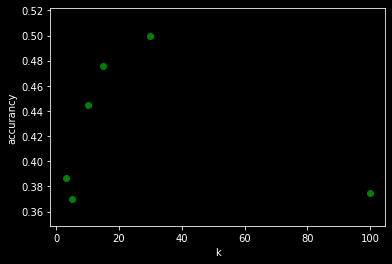

In [27]:
#k_nearest Neighbors classifier Scenario 2

#model with diffrent number of neighbours
a=[3,5,10,15,30,100]
scores2=[]
bestPreKNN2=0
indexKNN2=0


for i in a: 
    knnc2=KNeighborsClassifier(n_neighbors=i).fit(x2TrainScaled,y2_train)
    y2KnncPred=knnc2.predict(x2TestScaled)
    scores2.append(precision_score(y2_test,y2KnncPred))

    if precision_score(y2_test,y2KnncPred)>bestPreKNN2:
        bestPreKNN2=precision_score(y2_test,y2KnncPred)
        indexKNN2=i

    #scores on train and test data
    print('K_nearest Neighbour classifier on Train_scaled_data with {}_neighbors:{}'.format(i,knnc2.score(x2TrainScaled,y2_train)))
    print('K_nearest Neighbour classifier on Test_scaled_data with {}_neighbors:{}'.format(i,knnc2.score(x2TestScaled,y2_test)))

    #confusion matrix
    print('K_nearest Neighbour classifier with {}_neighbors:\n{}'.format(i,confusion_matrix
(y2_test,y2KnncPred)))

    #precision evaluation matrics
    print('Precision on K_nearest Neighbour classifider with {}_neighbors is:{}'.format(i,precision_score(y2_test,y2KnncPred)))

#visualise results of k_neares NeighobrsClassifier in dependency of  
plt.figure()
plt.xlabel('k')
plt.ylabel('accurancy')
plt.scatter(a,scores2,c='green')

BestKNN_2={indexKNN2,bestPreKNN2}

#accurancy of the model
print('K_nearest Neighbour classifier with best results is {} and has {}_neighbors:'.format(bestPreKNN2,indexKNN2))

#### logistic regresion (binary classification)

In [76]:
from sklearn.model_selection import learning_curve


train_sizes, train_scores, validation_scores = learning_curve(
estimator = LogisticRegression(random_state=0,solver='lbfgs',max_iter=1000),
X = X1_train,
y = y1_train,
cv = 5,
#scoring='neg_mean_squared_error',
shuffle=True
)

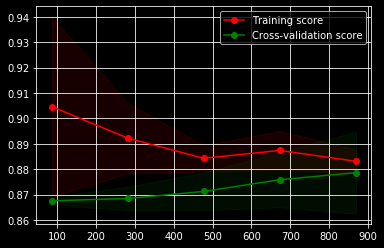

Logistic regresion intercept:[-3.63234047]
Logistic regresion coeficient [[ 1.22655791 -2.0432997   0.83091025  0.78905264 -1.1176261  -0.2830212
  -1.62965045 -1.07900028 -0.2768399   3.3008384   4.5211177 ]]
Logistic regresion score on TrainScaled Data:0.8868445262189513
Logistic regresion score on TestScaled Data:0.8419117647058824
Logistic regresion precission:0.38461538461538464
Logistic regresion confusion matrix:
[[224   8]
 [ 35   5]]


In [83]:
from sklearn.model_selection import learning_curve


train_sizes1, train_scores1, validation_scores1 = learning_curve(
estimator = LogisticRegression(random_state=0,solver='lbfgs',max_iter=1000),
X = x1TrainScaled,
y = y1_train,
cv = 5,
shuffle=True
)

train_scores_mean=np.mean(train_scores1,axis=1)
train_scores_std = np.std(train_scores1, axis=1)
validation_scores_mean=np.mean(validation_scores1,axis=1)
validation_scores_std = np.std(validation_scores1, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
             train_scores_mean + train_scores_std, alpha=0.1,
            color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
             validation_scores_mean + validation_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
    label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g",
    label="Cross-validation score")

plt.legend(loc="best")
plt.show()

cl1=LogisticRegression(random_state=0,solver='lbfgs').fit(x1TrainScaled,y1_train)
y1ClPred=cl1.predict(x1TestScaled)

print('Logistic regresion intercept:{}'.format(cl1.intercept_))
print('Logistic regresion coeficient {}'.format(cl1.coef_))
print('Logistic regresion score on TrainScaled Data:{}'.format(cl1.score(x1TrainScaled,y1_train)))
print('Logistic regresion score on TestScaled Data:{}'.format(cl1.score(x1TestScaled,y1_test)))
print('Logistic regresion precission:{}'.format(precision_score(y1_test,y1ClPred)))

#confusion matrix
print('Logistic regresion confusion matrix:\n{}'.format(confusion_matrix(y1_test,y1ClPred)))


In [0]:
#not necessary to visulise classification_report, because model has skew data and result expectation is found most positive results(most wine with good quality)
#print(classification_report(y1_test,y1ClPred,target_names=['class 0','class 1']))


#### Decision Tree classifier:

In [0]:
clTree1=tree.DecisionTreeClassifier().fit(x1TrainScaled, y1_train)
y1ClTreePred=clTree.predict(x1TestScaled)


print('Decision tree score on TrainScaled Data:{}'.format(clTree.score(xTrainScaled,y_train)))
print('Decision tree core on TestScaled Data:{}'.format(clTree.score(xTestScaled,y_test)))

#confusion matrix
print('Decision tree confusion matrix:\n{}'.format(confusion_matrix(y_test,yClTreePred)))

#### Linear suport vector machine classifier:

In [0]:
gamma=[0.01,1.0, 10.0]

#using different gamma
for l in gamma:
    clSVM=SVC(kernel='rbf', gamma=l).fit(xTrainScaled,y_train)
    yClSvm=clSVM.predict(xTestScaled)

    print('Support Vector machine score on TrainScaled Data with gamma:{}\n{}'.format(l,clSVM.score(xTrainScaled,y_train)))
    print('Support Vector machine core on TestScaled Data with gamma:{}\n{}'.format(l,clSVM.score(xTestScaled,y_test)))

    #confusion matrix
    print('Support Vector machine confusion matrix with gamma:{}\n{}'.format(l,confusion_matrix(y_test,yClSvm)))



#### Dummy Classifier

In [0]:
dummy_majority=DummyClassifier(strategy='most_frequent').fit(x1TrainScaled,y1_train)
y_dummy_predictions=dummy_majority.predict(x1TestScaled)

print(dummy_majority.score(x1TestScaled,y1_test))
print('Precision of Dummy Classifier is {}'.format(precision_score(y1_test, y_dummy_predictions)))

#confusion matrix
print('Dummy classifier confusion matrix:\n{}'.format(confusion_matrix(y1_test,y_dummy_predictions)))

##### Evaluation matrics and calssification _report

#### looking for bad predictions

In [0]:
y1_score_cl=cl1.decision_function(x1TestScaled)
y1_proba_cl=cl1.predict_proba(x1TestScaled)
y1ScoreList=list(zip(y1_test[0:20],y1_score_cl[0:20]))
y1ProbaList=list(zip(y1_test[0:20],y1_proba_cl[0:20,1]))
#print(yScoreList)   
print(y1ProbaList)

In [0]:
y1_comparison_cl=list(zip(y1_test,y1ClPred,y1_proba_cl[:,1]))

Pst that prediction of yCLPred is 1 depends on Last number: e.g. in row 2 pst that second number will be 1 is 0.459... for that reason the value is 0, pst|1>0,5.

In [0]:
for j,row in enumerate(y1_comparison_cl):
    if row[0]!=row[1]:
        print('row',j,'is',row)

In [0]:
y1ClPred_final=[]

for j,row in enumerate(y1_comparison_cl):
    if row[2]>=0.4:
        y1ClPred_final.append(1)
    else:
        y1ClPred_final.append(0)


In [0]:

y1_comparison_cl_final=list(
                zip(
                        y1_test,
                        y1ClPred,
                        y1_proba_cl[:,1],
                        y1ClPred_final
                )
        )

#print(y1_comparison_cl_final)
print(precision_score(y1_test,y1ClPred_final))



In [0]:
# calculate precision and recall for each threshold
cl_precision, cl_recall, _ = precision_recall_curve(y_test, y_score_cl)

# calculate scores
cl_f1, cl_auc = f1_score(y_test, yClPred), auc(cl_recall, cl_precision)
print('Clasiffication: f1=%.3f auc=%.3f' % (cl_f1, cl_auc))

plt.step(cl_recall, cl_precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(cl_recall, cl_precision, alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}')



In [0]:
for j,row in enumerate(y1_comparison_cl):
    if row[0]!=row[1]:
        print('row',j,'is',row)

In [0]:
for j,row in enumerate(y1_comparison_cl_final):
    if row[0]!=row[1]:
        print('row',j,'is',row)